We tried to characterize trends across years in the litreature by training individual models for each year we had in our time span. For the single year analysis we used the gensim model with lemmatization but filtered out the stopwords. Full analysis can be found at SingleYearAnalysis.ipynb 

Examples of trends included how the similarity score between our known promoters and inhibitors and the words 'promote' and 'inhibit' changed across the different years. We also looked at how empirically chosen optic nerve regeneration words similarity scores between each others changed over years such as 'neuron' and 'lipid'.

In [ ]:
import gensim 
import glob
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

In [ ]:
model_path = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/SingleYear/Gensim_Lemmatized_Removed_Stopwords/"
model_files = glob.glob(model_path + "*.kv")
model_files

['/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/SingleYear/Gensim_Lemmatized_Removed_Stopwords/1776.kv',
 '/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/SingleYear/Gensim_Lemmatized_Removed_Stopwords/1795.kv',
 '/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/SingleYear/Gensim_Lemmatized_Removed_Stopwords/1820.kv',
 '/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/SingleYear/Gensim_Lemmatized_Removed_Stopwords/1824.kv',
 '/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/SingleYear/Gensim_Lemmatized_Removed_Stopwords/1826.kv',
 '/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/SingleYear/Gensim_Lemmatized_Removed_Stopwords/1827.kv',
 '/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/SingleYear/Gensim_Lemmatized_Removed_Stopwords/1828.kv',
 '/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/SingleYear/Gensim

In [ ]:
gensim_models = {} 
for model_path in model_files:
  key = model_path.split('/')[-1].split('.')[0]
  print(key) 
  gensim_models[key] = gensim.models.KeyedVectors.load(model_path, mmap='r')

1776
1795
1820
1824
1826
1827
1828
1831
1832
1835
1837
1840
1841
1842
1843
1845
1846
1850
1852
1855
1856
1857
1858
1859
1860
1863
1867
1868
1869
1870
1871
1874
1875
1877
1878
1879
1881
1883
1884
1885
1886
1887
1888
1889
1890
1892
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1949
1952
1954
1956
1973
1974
1977
1980
1981
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2014
2015


In [ ]:
years = list(gensim_models.keys())

In [ ]:
plt.rcParams['figure.figsize'] = [25, 10]

# Promoters and Inhibitors

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.80359066, 0, 0.99183005, 0.99418557, 0.98592746, 0.8080736, 0.97143334]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.95708567, 0, 0.9975007, 0.9256592, 0.99940294, 0.937008, 0.9524407]


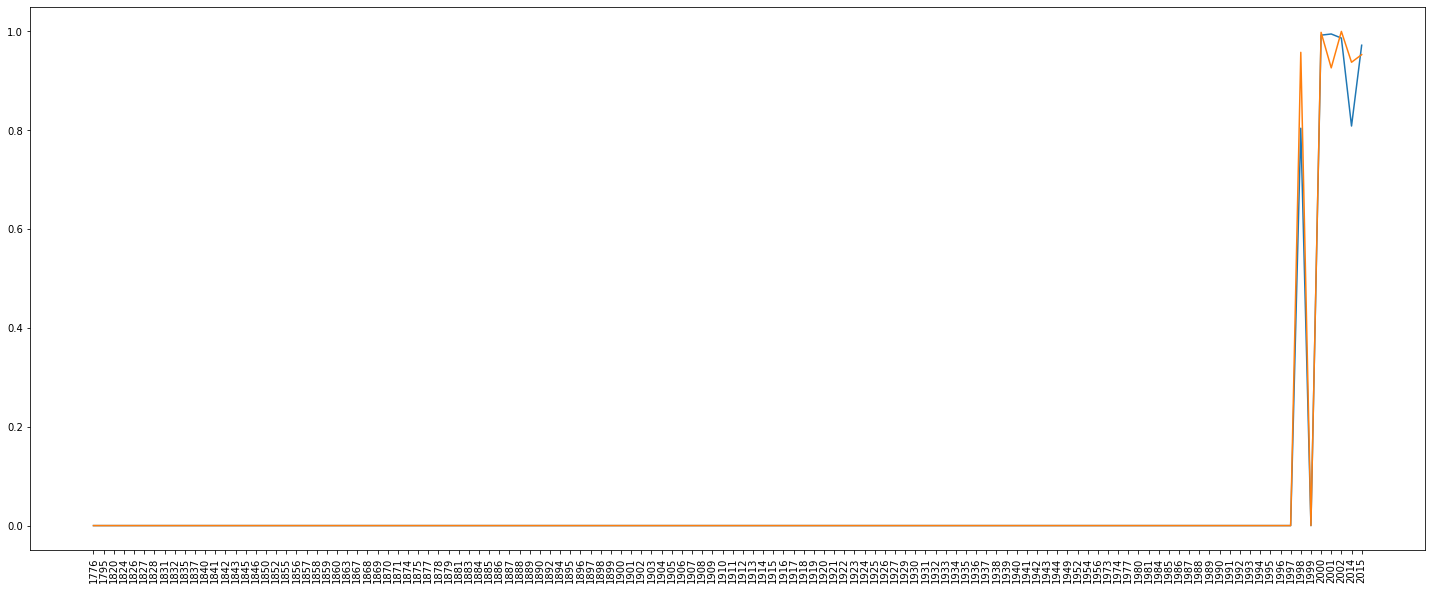

In [ ]:
keyword = "camp"
word1 = "promoter"
word2 = "inhibitor"
word1_similarity = [] 
word2_similarity = [] 
for year, wv in gensim_models.items():
  try:
    p_similarity = wv.similarity(keyword, word1)
    i_similarity = wv.similarity(keyword, word2)
    word1_similarity.append(abs(p_similarity))
    word2_similarity.append(abs(i_similarity))
    # print("\t" + str(similarity))
  except KeyError:
    # print("\tWord not in vocabulary")
    word1_similarity.append(0) 
    word2_similarity.append(0) 

plt.xticks(rotation=90)
plt.plot(years, word1_similarity) 
plt.plot(years, word2_similarity) 
print(word1_similarity)
print(word2_similarity)

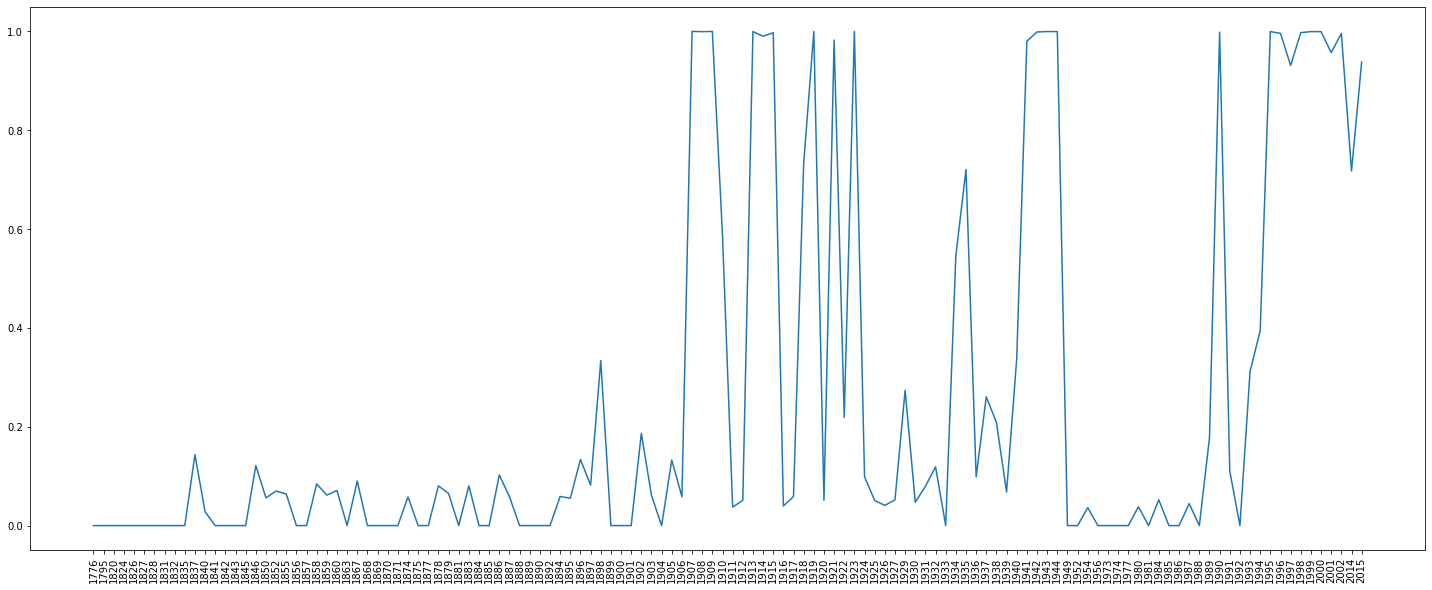

In [ ]:
word_to_compare = "eye"
word_to_compare_two = "sheath"
similarity_arr = [] 
for year, wv in gensim_models.items():
  try:
    similarity = wv.similarity(word_to_compare, word_to_compare_two)
    similarity_arr.append(abs(similarity))
    # print("\t" + str(similarity))
  except KeyError:
    # print("\tWord not in vocabulary")
    similarity_arr.append(0) 

plt.xticks(rotation=90)
plt.plot(years, similarity_arr) 

# Ranking

In [ ]:
# neuron, glia
# neuron, myelin (look at when myelin was discovered) 
# neuron, apoptosis 
# crystallin, regeneration 
# neuron, lipid 

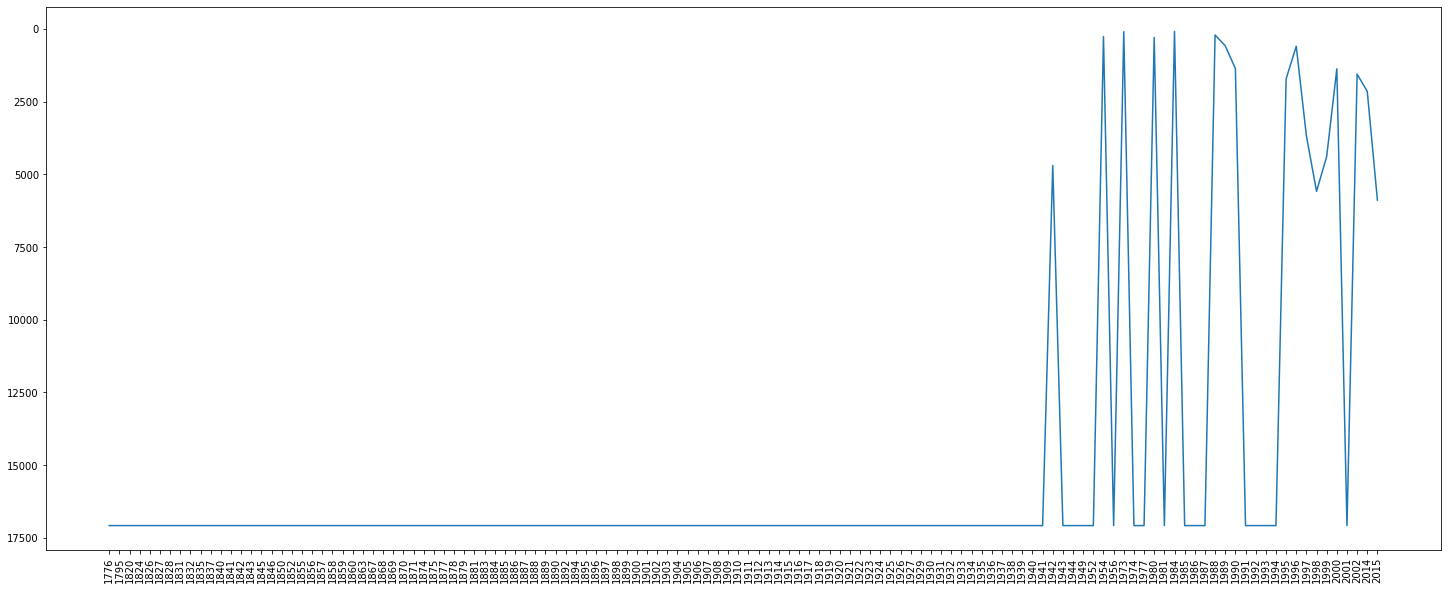

In [ ]:
word_to_compare = "neuron"
word_to_compare_two = "lipid"
ranking_arr = [] 
for year, wv in gensim_models.items():
  try:
    similarity = wv.rank(word_to_compare, word_to_compare_two)
    ranking_arr.append(abs(similarity))
    # print("\t" + str(similarity))
  except KeyError:
    # print("\tWord not in vocabulary")
    ranking_arr.append(-1) 

ranking_arr = np.array(ranking_arr) 
ranking_arr[ranking_arr == -1] = np.amax(ranking_arr) 

plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.plot(years, ranking_arr) 

# Percentline Ranking

In [ ]:
len(gensim_models['1984'].index2word)

699

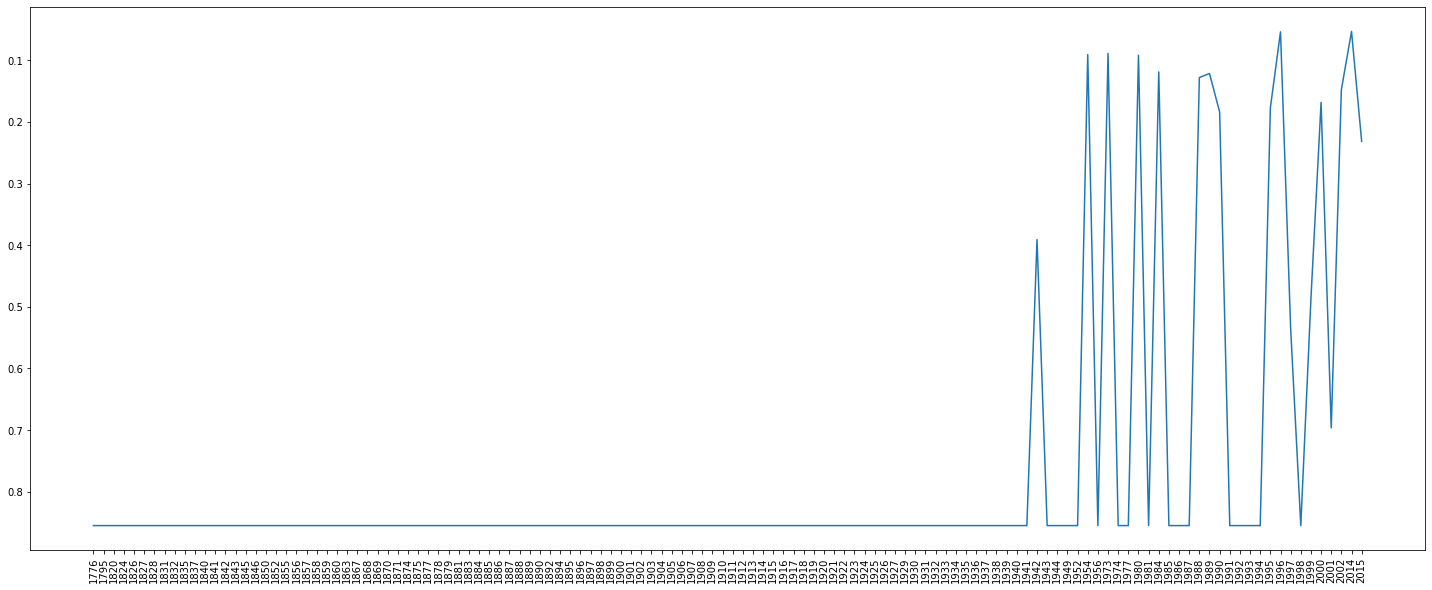

In [ ]:
word_to_compare = "neuron"
word_to_compare_two = "lipid"
ranking_arr = [] 
for year, wv in gensim_models.items():
  try:
    rank = wv.rank(word_to_compare, word_to_compare_two)
    num_words = len(wv.index2word)
    ranking_arr.append(abs(rank/num_words))
    # print("\t" + str(rank))
  except KeyError:
    # print("\tWord not in vocabulary")
    ranking_arr.append(-1) 

ranking_arr = np.array(ranking_arr) 
ranking_arr[ranking_arr == -1] = np.amax(ranking_arr) 

plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.plot(years, ranking_arr) 

# N similarity

In [ ]:
# Neuron regeneration + trophic factors 
# neuron apoptosis + pore formation 
# neuron synapse + bipolar cells 

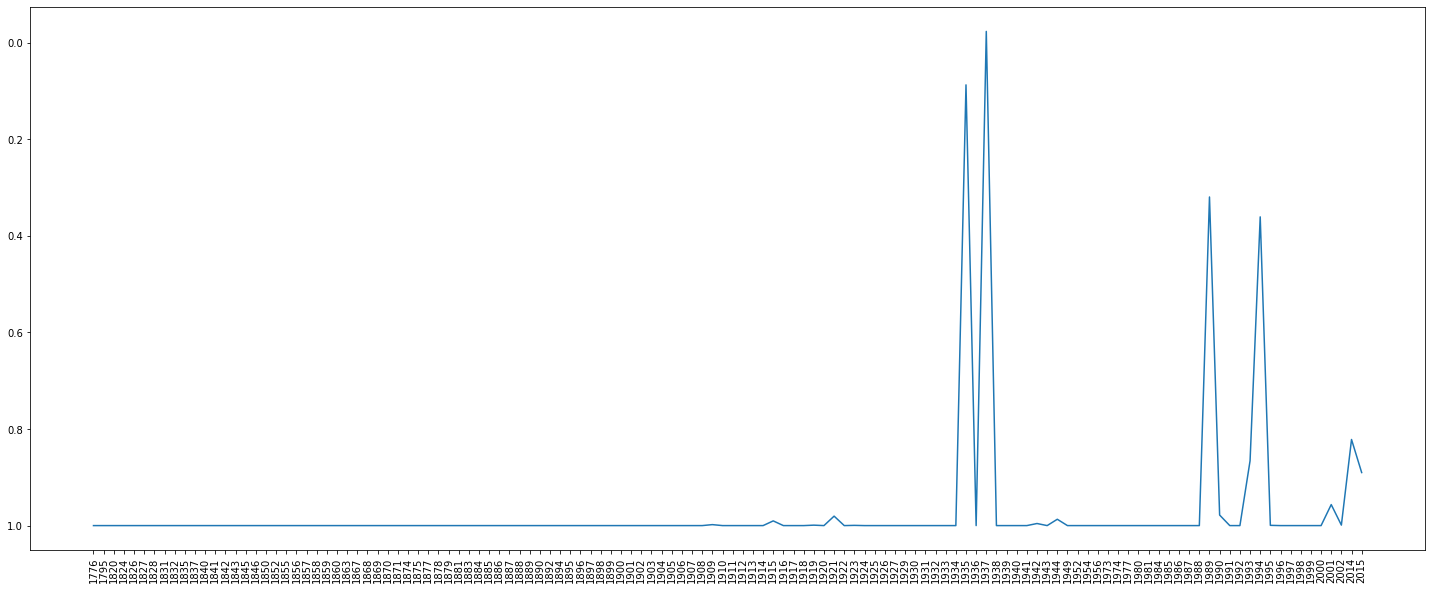

In [ ]:
arr1 = "neuron synapse".split(); 
arr2 = "bipolar cells".split(); 
ranking_arr = [] 
for year, wv in gensim_models.items():
  try:
    similarity = wv.n_similarity(arr1, arr2) 
    ranking_arr.append(similarity)
    # print("\t" + str(rank))
  except KeyError:
    # print("\tWord not in vocabulary")
    ranking_arr.append(-1) 

ranking_arr = np.array(ranking_arr) 
ranking_arr[ranking_arr == -1] = np.amax(ranking_arr) 

plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.plot(years, ranking_arr) 

# Top n similar

In [ ]:
word = "nerve" 
df = pd.DataFrame()
for year,wv in gensim_models.items():
  try:
    df[year] = [word_tuple[0] for word_tuple in wv.most_similar(word, topn=20)]
  except:
    df[year] = ["Word not found"] * 20

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys


,1776,1795,1820,1824,1826,1827,1828,1831,1832,1835,...,1995,1996,1997,1998,1999,2000,2001,2002,2014,2015
0,6th,affirm,jelly,recouvrent,scirrhoos,do,doctrine,Word not found,ether,Word not found,...,tectum,axon,axon,axon,crush,injury,injure,fiber,neuropathy,neuropathy
1,branch,direction,branch,wundartzeneykunst,pupil,pupil,pupil,Word not found,terminating,Word not found,...,day,crush,cell,regenerate,transect,observe,keywords,lesion,neuritis,neuropathies
2,express,sal,prevent,cette,patpd,wise,elliotson,Word not found,branch,Word not found,...,tract,develop,lesion,graft,tract,graft,graft,graft,electric,biomechanical
3,lead,tedious,perfectly,montrant,progress,unite,unite,Word not found,contraction,Word not found,...,regeneration,lesion,regeneration,target,transection,rgc,regeneration,axon,nerves,retinotopic
4,entire,branch,entertain,pupil,lead,perior,perfectly,Word not found,neuralgia,Word not found,...,lesion,fiber,study,cell,chiasm,animal,piece,treatment,chiasm,disc
5,perfectly,express,grasp,éditeur,wise,nt1mber,black,Word not found,unite,Word not found,...,prior,axonal,cns,fiber,distal,axon,cns,regeneration,tectum,chiasm
6,unite,seve1,black,porta,seve1,person,invisible,Word not found,intervene,Word not found,...,myelination,day,develop,neuron,section,day,optic,day,disc,behbehani
7,throw,ultimate,invisible,tize,branch,oppose,person,Word not found,oppose,Word not found,...,oligodendrocyte,fibre,gene,study,optic,response,regenerate,study,33protection,linical
8,gentleman,lead,line,agitait,prevent,gregori,oppose,Word not found,morning,Word not found,...,segment,cns,retina,cns,sciatic,rgcs,axon,regenerate,neuropathies,imal
9,heal,perfectly,globular,obliterated,olight,sue,surg,Word not found,heal,Word not found,...,injury,observe,regenerate,regeneration,lesione,study,distance,model,larva,goldfish
